In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
df = pd.read_csv('data.csv')
df['volume_residential'] = df['volume_residential'].str.replace(',', '').astype(float)
df = df.dropna(subset=['gdp'])
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/h4/994pp03n5kg8x_b610__2_lm0000gn/T/ipykernel_92475/3408820206.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [6]:
X = df[["inflation rate"]]
y = df["close_residential"].values


In [7]:
X = sm.add_constant(X)

In [8]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9053
Date:                Fri, 21 Mar 2025   Prob (F-statistic):              0.348
Time:                        12:59:38   Log-Likelihood:                -165.13
No. Observations:                  36   AIC:                             334.3
Df Residuals:                      34   BIC:                             337.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            187.8067      9.812     19.

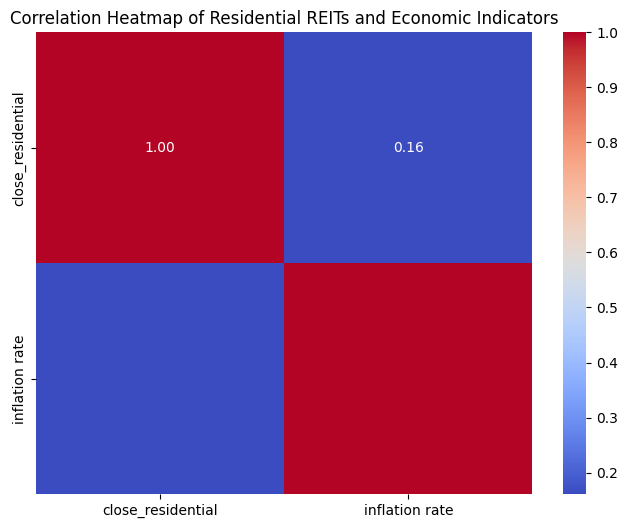

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["close_residential", "inflation rate"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Residential REITs and Economic Indicators")
plt.show()


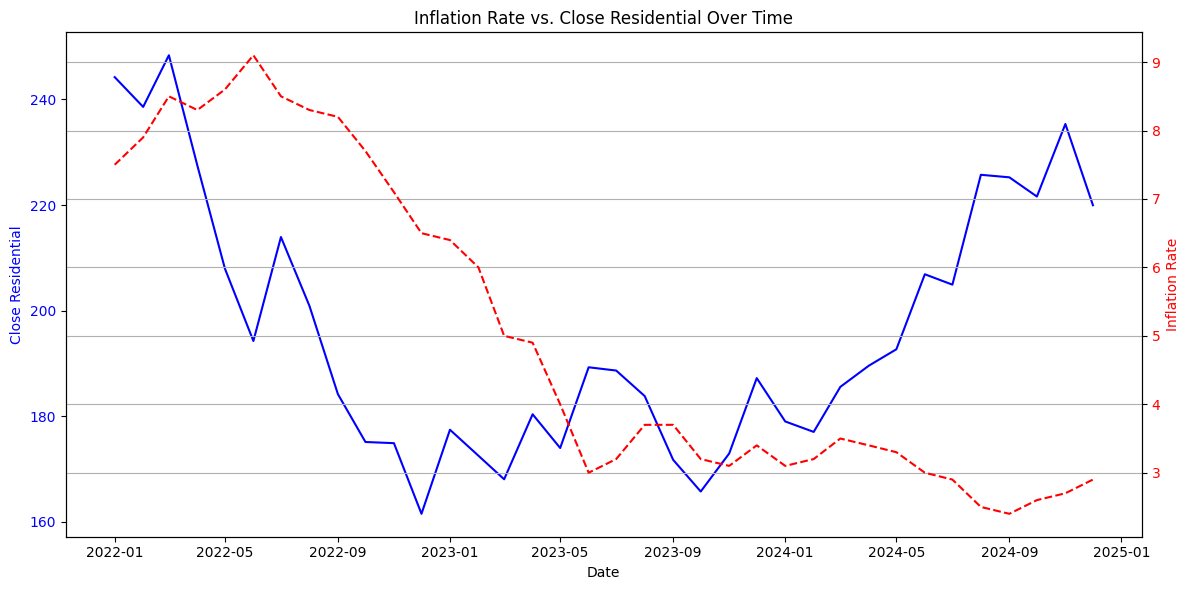

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df["Date"], df["close_residential"], label="Close Residential", color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Residential", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(df["Date"], df["inflation rate"], label="Inflation Rate", color="red", linestyle="dashed")
ax2.set_ylabel("Inflation Rate", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Inflation Rate vs. Close Residential Over Time")
fig.tight_layout()
plt.grid(True)

plt.show()

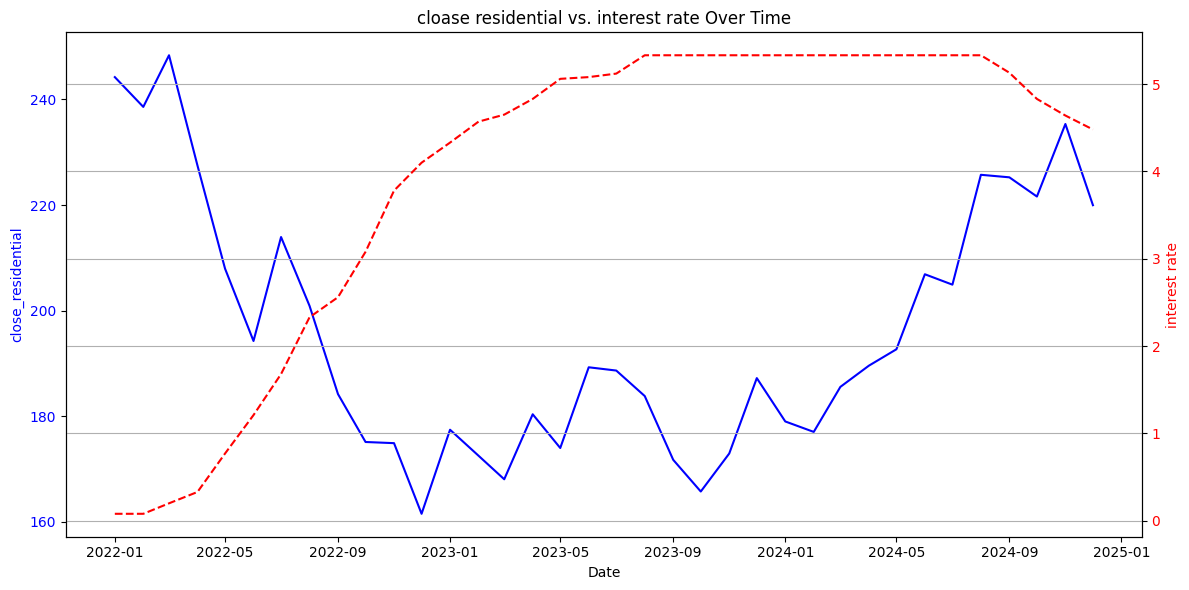

In [11]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df["Date"], df["close_residential"], label="close_residential", color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("close_residential", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(df["Date"], df["interest rate"], label="interest rate", color="red", linestyle="dashed")
ax2.set_ylabel("interest rate", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("cloase residential vs. interest rate Over Time")
fig.tight_layout()
plt.grid(True)

plt.show()